In [4]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import datasets, manifold
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px



In [13]:
dataset = pd.read_csv("https://raw.githubusercontent.com/RouseJo/DTSC691/main/Year.csv")
dataset

mag   len  wid        TMP      SPFH      PRES  UGRD  VGRD   DLWRF  \
0     0.0  0.78   75  305.03003  0.011053  92842.33 -4.21  3.52  425.94   
1     0.0  0.56   50  307.69000  0.010254  91664.90  3.01  3.72  454.71   
2     0.0  2.98   75  307.38000  0.010856  91792.58  5.05  3.60  450.19   
3     2.0  6.51  480  307.38000  0.010856  91792.58  5.05  3.60  450.19   
4     0.0  1.00   50  306.93000  0.011528  91803.92  6.25  4.31  450.19   
...   ...   ...  ...        ...       ...       ...   ...   ...     ...   
5457  0.0  1.34  100  285.64000  0.002645  91084.21  4.16  3.15  258.17   
5458  0.0  3.16  156  283.60000  0.001958  92026.42  6.36 -1.94  215.77   
5459  0.0  0.36   25  300.82000  0.005622  92776.91 -2.61  2.48  343.79   
5460  0.0  4.36  100  288.96000  0.003975  91606.27  1.90 -2.90  284.21   
5461  0.0  0.01   30  301.78000  0.011449  91760.91 -1.95  7.62  387.41   

          CAPE   PEVAP    APCP    DSWRF    yr  
0      504.320  0.7305  0.0000  335.984  2010  
1      118.592  0.5762  0.0000  191.770  2010  
2       42.560  0.8650  0.0000  529.297  2010  
3       42.560  0.8650  0.0000  529.297  2010  
4       59.520  0.7430  0.0000  528.392  2010  
...        ...     ...     ...      ...   ...  
5457     0.000  0.0766  0.0000    0.000  2020  
5458     0.000  0.1489  0.0000    0.000  2020  
5459     0.000  0.5657  0.0000  449.623  2020  
5460     0.000  0.1348  0.0000    0.000  2020  
5461  2029.083  0.5260  3.2663  207.297  2020  

[5462 rows x 14 columns]

In [14]:
dataset['num'] =  dataset.index

dataset

mag   len  wid        TMP      SPFH      PRES  UGRD  VGRD   DLWRF  \
0     0.0  0.78   75  305.03003  0.011053  92842.33 -4.21  3.52  425.94   
1     0.0  0.56   50  307.69000  0.010254  91664.90  3.01  3.72  454.71   
2     0.0  2.98   75  307.38000  0.010856  91792.58  5.05  3.60  450.19   
3     2.0  6.51  480  307.38000  0.010856  91792.58  5.05  3.60  450.19   
4     0.0  1.00   50  306.93000  0.011528  91803.92  6.25  4.31  450.19   
...   ...   ...  ...        ...       ...       ...   ...   ...     ...   
5457  0.0  1.34  100  285.64000  0.002645  91084.21  4.16  3.15  258.17   
5458  0.0  3.16  156  283.60000  0.001958  92026.42  6.36 -1.94  215.77   
5459  0.0  0.36   25  300.82000  0.005622  92776.91 -2.61  2.48  343.79   
5460  0.0  4.36  100  288.96000  0.003975  91606.27  1.90 -2.90  284.21   
5461  0.0  0.01   30  301.78000  0.011449  91760.91 -1.95  7.62  387.41   

          CAPE   PEVAP    APCP    DSWRF    yr   num  
0      504.320  0.7305  0.0000  335.984  2010     0  
1      118.592  0.5762  0.0000  191.770  2010     1  
2       42.560  0.8650  0.0000  529.297  2010     2  
3       42.560  0.8650  0.0000  529.297  2010     3  
4       59.520  0.7430  0.0000  528.392  2010     4  
...        ...     ...     ...      ...   ...   ...  
5457     0.000  0.0766  0.0000    0.000  2020  5457  
5458     0.000  0.1489  0.0000    0.000  2020  5458  
5459     0.000  0.5657  0.0000  449.623  2020  5459  
5460     0.000  0.1348  0.0000    0.000  2020  5460  
5461  2029.083  0.5260  3.2663  207.297  2020  5461  

[5462 rows x 15 columns]

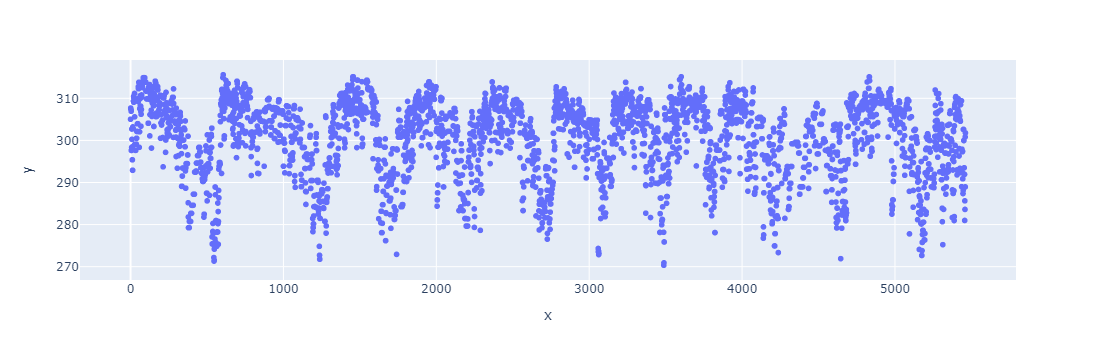

In [16]:
x_col = 
y_col = 
fig = px.scatter(x=dataset['num'] ,
                     y=dataset['TMP'] )
fig

In [17]:
dcol = dataset.columns
dcl = dcol.tolist()
dcl


['mag',
 'len',
 'wid',
 'TMP',
 'SPFH',
 'PRES',
 'UGRD',
 'VGRD',
 'DLWRF',
 'CAPE',
 'PEVAP',
 'APCP',
 'DSWRF',
 'yr',
 'num']

In [4]:
df = dataset[]

SyntaxError: invalid syntax (1916782302.py, line 1)

Positive correlation: TMP - DLWRF and SPFH - DLWRF
Other correlations notes: TMP -SPFH and TMP - PEVAP seem to have a one limit but not another limit. Creates a clear line between 
Width has linear path with temperature, SPFH, PRES and CAPE, or at least have the least amount of outliers
CAPE has distinct clusters with TMP, SPFH, PRES, UGRD, VGRD, and DLWRF

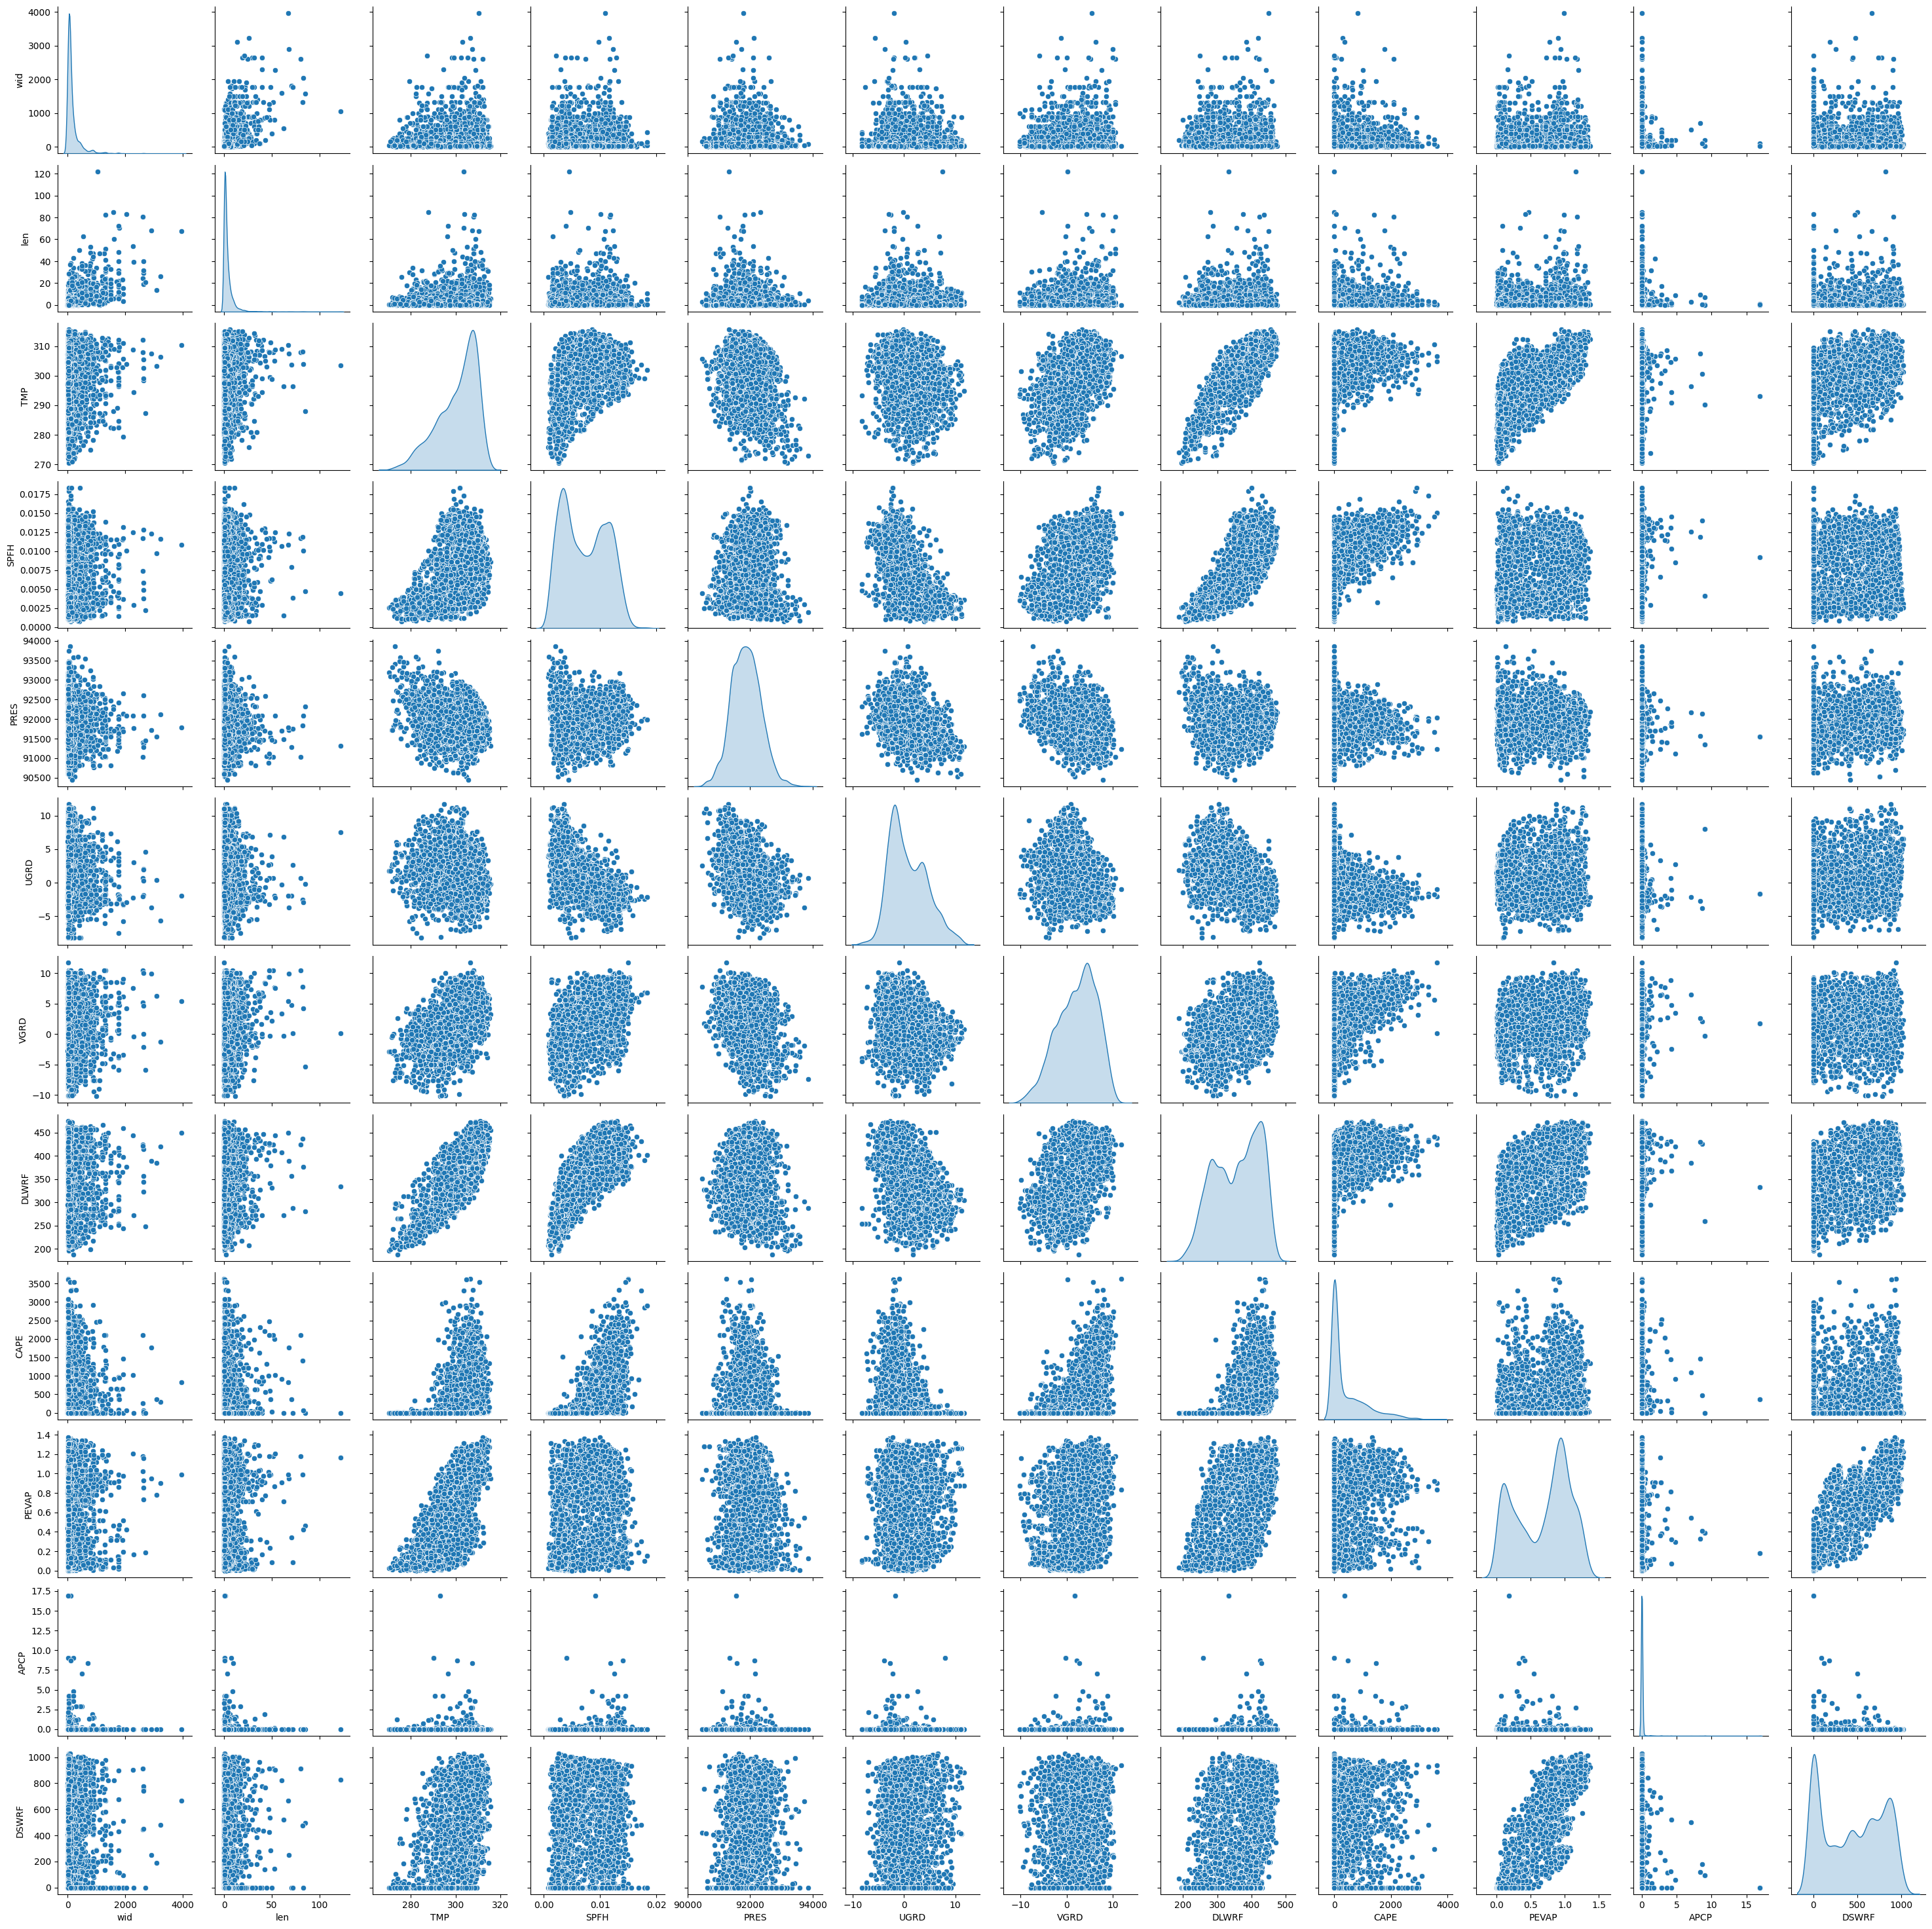

In [8]:
sns.pairplot(dataset[["wid", "len", "TMP", "SPFH", "PRES", "UGRD", "VGRD", "DLWRF", "CAPE", "PEVAP", "APCP", "DSWRF"]], diag_kind="kde")

<Axes: ylabel='TMP'>

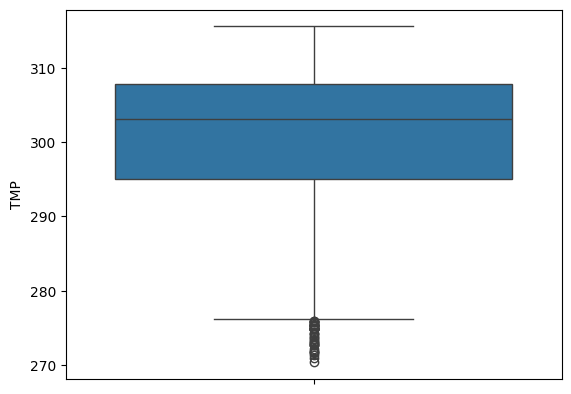

In [9]:
sns.boxplot(dataset['TMP'])

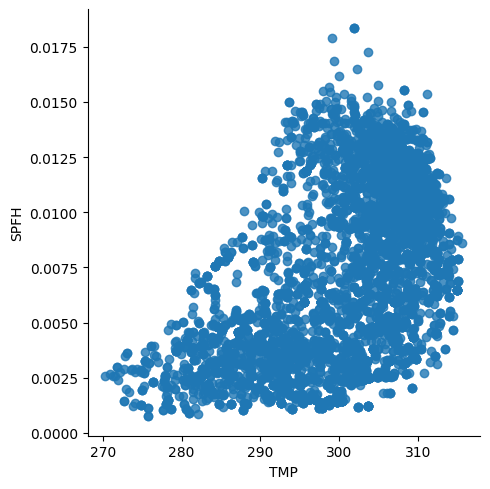

In [10]:
sns.lmplot(x = 'TMP', y = 'SPFH', data=dataset,  palette = 'coolwarm', aspect = 1, fit_reg = False)

In [11]:
X = dataset.index.to_numpy()
y = dataset['TMP'].to_numpy()
z = dataset['SPFH'].to_numpy()

dataset['num'] =  dataset.index
dfy = pd.DataFrame({'x':X, 'TMP':y})
#dfy.plot('Tornadoes', 'Temperature', kind='scatter')
dataset

mag   len  wid        TMP      SPFH      PRES  UGRD  VGRD   DLWRF  \
0     0.0  0.78   75  305.03003  0.011053  92842.33 -4.21  3.52  425.94   
1     0.0  0.56   50  307.69000  0.010254  91664.90  3.01  3.72  454.71   
2     0.0  2.98   75  307.38000  0.010856  91792.58  5.05  3.60  450.19   
3     2.0  6.51  480  307.38000  0.010856  91792.58  5.05  3.60  450.19   
4     0.0  1.00   50  306.93000  0.011528  91803.92  6.25  4.31  450.19   
...   ...   ...  ...        ...       ...       ...   ...   ...     ...   
5457  0.0  1.34  100  285.64000  0.002645  91084.21  4.16  3.15  258.17   
5458  0.0  3.16  156  283.60000  0.001958  92026.42  6.36 -1.94  215.77   
5459  0.0  0.36   25  300.82000  0.005622  92776.91 -2.61  2.48  343.79   
5460  0.0  4.36  100  288.96000  0.003975  91606.27  1.90 -2.90  284.21   
5461  0.0  0.01   30  301.78000  0.011449  91760.91 -1.95  7.62  387.41   

          CAPE   PEVAP    APCP    DSWRF   num  
0      504.320  0.7305  0.0000  335.984     0  
1      118.592  0.5762  0.0000  191.770     1  
2       42.560  0.8650  0.0000  529.297     2  
3       42.560  0.8650  0.0000  529.297     3  
4       59.520  0.7430  0.0000  528.392     4  
...        ...     ...     ...      ...   ...  
5457     0.000  0.0766  0.0000    0.000  5457  
5458     0.000  0.1489  0.0000    0.000  5458  
5459     0.000  0.5657  0.0000  449.623  5459  
5460     0.000  0.1348  0.0000    0.000  5460  
5461  2029.083  0.5260  3.2663  207.297  5461  

[5462 rows x 14 columns]

In [ ]:
dfz = pd.DataFrame({'Tornadoes':X, 'Specific Humidity':z})
dfz.plot('Tornadoes', 'Specific Humidity', kind='scatter')

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(dataset, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Temperature')
plt.ylabel('Specific Humidity')
plt.show()

In [18]:
labels = dataset['TMP'].to_numpy()
labels

array([305.03003, 307.69   , 307.38   , ..., 300.82   , 288.96   ,
       301.78   ])

In [ ]:
fig, ax = plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')

In [15]:
features = dataset.drop(['mag'], axis=1).to_numpy()
features.shape

(5462, 13)

Agglomerative Clustering Models

Cosine Affinity

In [19]:
#Using cosine Affinity
agg_aff_cos = AgglomerativeClustering(n_clusters=11, linkage = "average", affinity = 'cosine')
agg_aff_cos.fit(dataset)


C:\Users\18593\anaconda3\envs\met\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=11)

In [20]:
agg_aff_cos_score = mean_squared_error(labels, agg_aff_cos.labels_)
agg_aff_cos_score

88076.43950792598

In [21]:
root_mse = np.sqrt(agg_aff_cos_score)
root_mse

296.77675028196865

l1 Affinity


In [22]:
agg_aff_l1 = AgglomerativeClustering(n_clusters=11, linkage = "average", affinity = 'l1')
agg_aff_l1.fit(dataset)

C:\Users\18593\anaconda3\envs\met\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='l1', linkage='average', n_clusters=11)

In [23]:
agg_aff_l1_score = mean_squared_error(labels, agg_aff_l1.labels_)
agg_aff_l1_score

87154.36644778316

Chosing l1 to vary the metric due to some of the features having alot of zeros in them

The next few samples will change the linkage between average and Ward

In [24]:
#Using average linkage 
agg_lnk_ward = AgglomerativeClustering(n_clusters=5, linkage = "ward")
agg_lnk_ward.fit(dataset)

AgglomerativeClustering(n_clusters=5)

In [25]:
agg_lnk_ward_score = mean_squared_error(labels, agg_lnk_ward.labels_)
agg_lnk_ward_score

89428.52162165355

<Axes: xlabel='num', ylabel='TMP'>

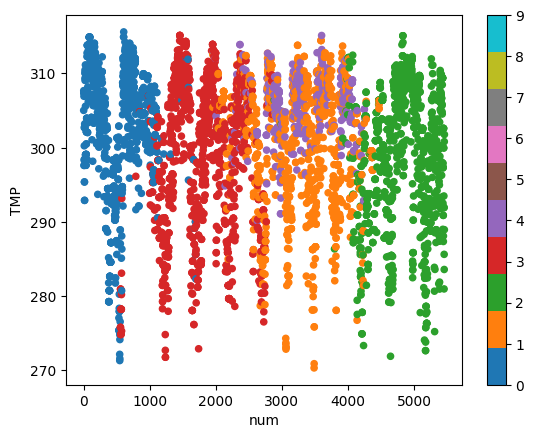

In [26]:
agf_categories = agg_lnk_ward.fit_predict(dataset)
#agf_categories
dataset.plot.scatter(x = -1, y = 3, c = agf_categories, cmap = "tab10", vmin = 0, vmax = 9)


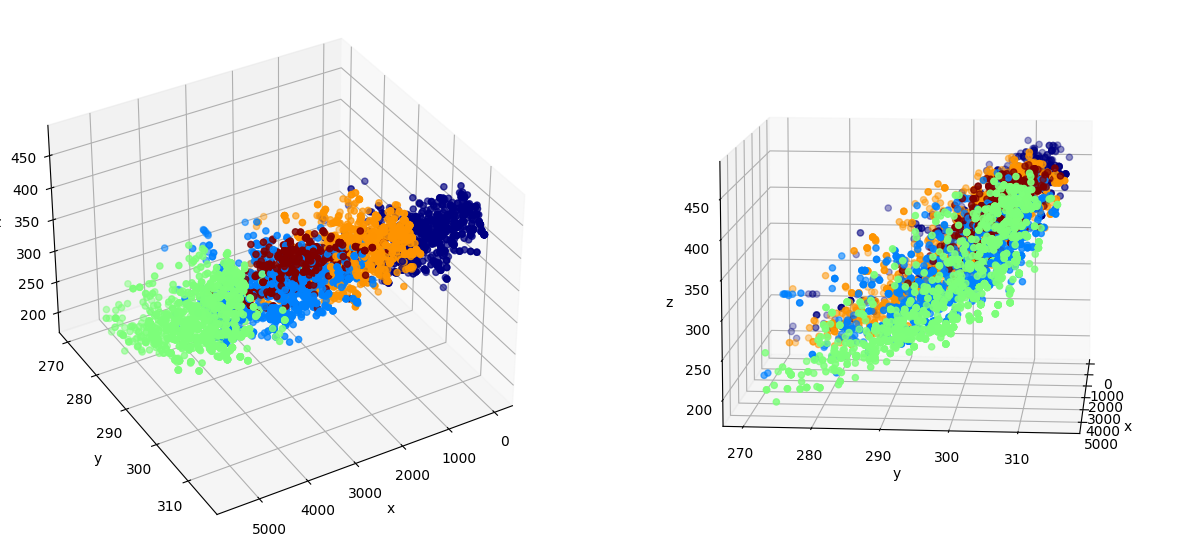

In [235]:
x = dataset.index.to_numpy()
y = dataset['TMP'].to_numpy()
z = dataset['DLWRF'].to_numpy()

#creating 3 dimensional space
fig = plt.figure(figsize=[15, 15])

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.set_zlabel('z')
ax1.view_init(35, 60)
ax1.scatter3D(x, y, z, c = agf_categories, cmap='jet');

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_ylabel('y')
ax2.set_xlabel('x')
ax2.set_zlabel('z')
ax2.view_init(10, 5)
ax2.scatter3D(x, y, z, c = agf_categories, cmap='jet');

In [201]:
digits = dataset
#X, y = features, labels
#n_samples, n_features = X.shape

#np.random.seed(0)
 

C:\Users\18593\AppData\Local\Temp\ipykernel_26124\2831509060.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  *X_red[y == digit].T,
C:\Users\18593\AppData\Local\Temp\ipykernel_26124\2831509060.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  c=plt.cm.nipy_spectral(labels[y == digit] / 10),
C:\Users\18593\AppData\Local\Temp\ipykernel_26124\2831509060.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  *X_red[y == digit].T,
C:\Users\18593\AppData\Local\Temp\ipykernel_26124\2831509060.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  c=plt.cm.nipy_spectral(labels[y == digit] / 10),
C:\Users\18593\AppData\Local\Temp\ipykernel_26124\2831509060.py:9: FutureWar

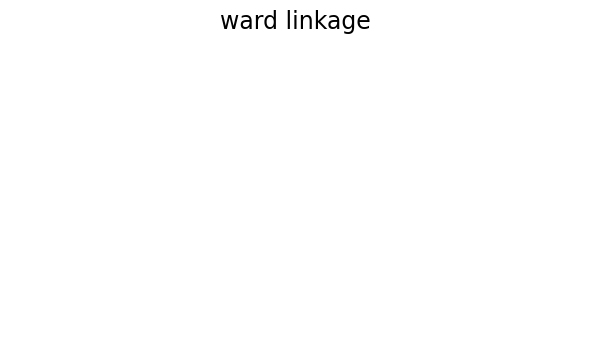

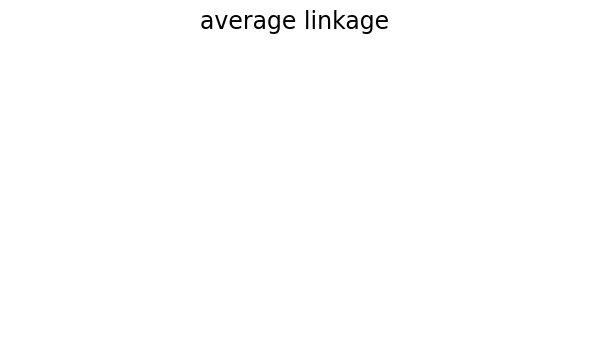

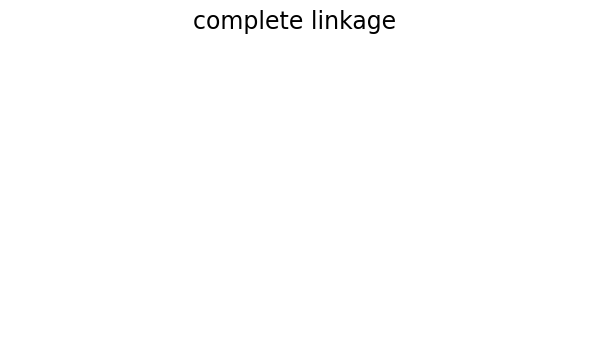

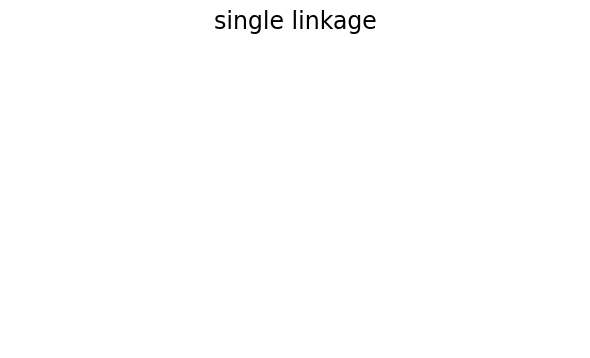

In [207]:
# Visualize the clustering
def plot_clustering(X, y, title=None):
    #x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    #X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.columns:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(digits)


for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    #t0 = time()
    clustering.fit(X_red)
    #print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

Gausian Mixture Model

In [54]:
gmm_model = GaussianMixture(n_components = 5).fit(dataset)

In [55]:
gmm_labels = gmm_model.predict(dataset)

In [56]:
weights = gmm_model.weights_
means = gmm_model.means_
covariances = gmm_model.covariances_

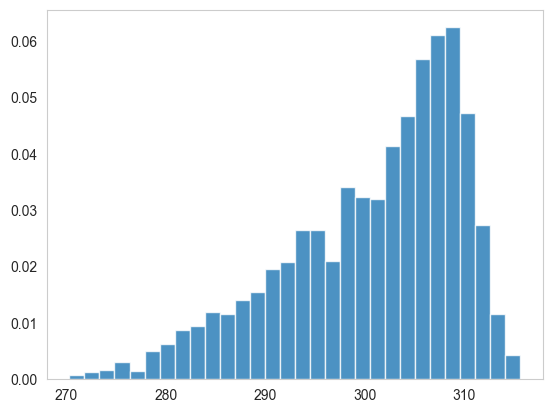

In [91]:
x_axis = x

plt.hist(x,  bins=30, histtype='bar', density=True, alpha=0.8)
#plt.plot(x, weights[0] (dataset, means[0],np.sqrt(covariances[0])).ravel())
#plt.plot(x, weights[1] (dataset, means[1],np.sqrt(covariances[1])).ravel())
#plt.plot(x, weights[2] (dataset, means[2],np.sqrt(covariances[2])).ravel())

plt.grid()
plt.show()


Agglomerative Clustering on 2D Embedding of Digits

In [ ]:
digits = dataset.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

In [92]:
plt.figure(figsize=(6, 4))
 plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>